In [1]:
push!(LOAD_PATH, "..")

4-element Array{ByteString,1}:
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "/Users/rdeits/6.338/hw2"                                                           
 ".."                                                                                

In [2]:
using AffineTransforms
using PyPlot

In [21]:
reload("Ev3")
import Ev3

In [22]:
hostname = "192.168.1.27"
meters_per_revolution = 37.2 * 2.54 / 100 / 5 
# 37.2 inches in 5 revolutions
gyro_port = "in4"
us_port = "in1"
motor_ports = Ev3.Sides("outC", "outB")
distance_between_wheels = 4.5
T_origin_to_ultrasound = tformtranslate(0.0254 * [3.0, 0.0])
config = Ev3.RobotConfig(hostname,
    meters_per_revolution,
    gyro_port,
    us_port,
    motor_ports,
    distance_between_wheels,
    T_origin_to_ultrasound)

robot = Ev3.Robot(config)

Ev3.Robot(Ev3.RobotConfig("192.168.1.27",0.18897600000000003,"in4","in1",Ev3.Sides{ASCIIString}("outC","outB"),4.5,AffineTransforms.AffineTransform{Float64,2}:
matrix: 2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
translation: [0.07619999999999999,0.0]
),Ev3.Sides{Ev3.Motor}(Ev3.Motor(Ev3.RemoteNode("/sys/class/tacho-motor/motor12","192.168.1.27",ZMQ.Socket(Ptr{Void} @0x00007f90e7b15600,Base._FDWatcher(Ptr{Void} @0x00007f90e9ace020,(1,0),Condition(Any[]),(false,false)))),Set(SubString{ASCIIString}["run-timed","stop","run-direct","run-to-rel-pos","reset","run-forever","run-to-abs-pos"])),Ev3.Motor(Ev3.RemoteNode("/sys/class/tacho-motor/motor11","192.168.1.27",ZMQ.Socket(Ptr{Void} @0x00007f90e8959200,Base._FDWatcher(Ptr{Void} @0x00007f90e9f27cd0,(1,0),Condition(Any[]),(false,false)))),Set(SubString{ASCIIString}["run-timed","stop","run-direct","run-to-rel-pos","reset","run-forever","run-to-abs-pos"]))),Ev3.MappingSensors(Ev3.Sensor(Ev3.RemoteNode("/sys/class/lego-sensor/sensor3","192.168.1.27

In [23]:
m = Ev3.run_mapping(robot)

Ev3.Map(Tuple{Real,Real}[(-0.23273608642452476,-0.34504543769740836),(-0.23479085938809147,-0.34809176389234764),(-0.23710394219353478,-0.3515210501766358),(-0.23785833069984372,-0.35263947713118404),(-0.23973110501309414,-0.35541597923084245),(-0.242833805477765,-0.3600159218367498),(-0.23728295848169922,-0.3517864527381964),(-0.23635976827759592,-0.3504177669750796),(-0.2387917354943171,-0.354023306647293),(-0.2394551246754679,-0.35500682155420077)  …  (-0.2372374028998298,-0.351718913810619),(-0.23490963196078868,-0.34826785147275835),(-0.2637795531993753,-0.33028048652460207),(-0.2913445885584802,-0.3010957189306967),(-0.3202554388416732,-0.27957548566409357),(-0.3486301168321015,-0.2476704840647688),(-0.392553146297514,-0.21952672578305754),(-0.4187974224753715,-0.18556248339444487),(-0.4514568464141636,-0.14161580801219315),(-0.8939335079851303,0.007395622756572594)],AffineTransforms.AffineTransform[AffineTransforms.AffineTransform{Float64,2}:
matrix: 2x2 Array{Float64,2}:
 -0.55

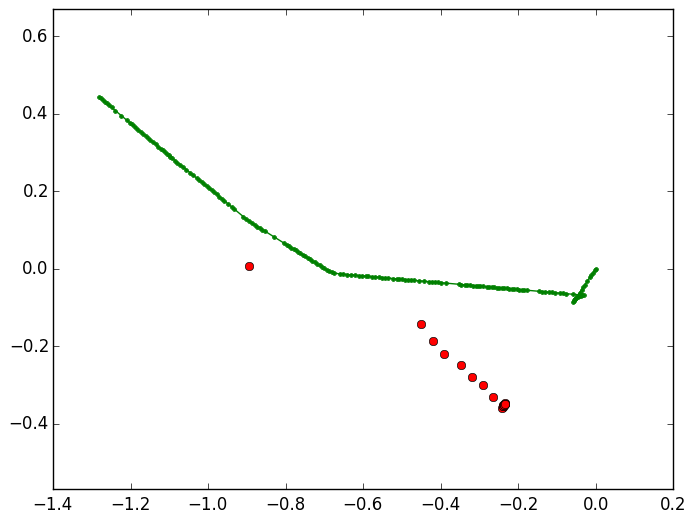

(-1.4000000000000001,0.19999999999999996,-0.4,0.5)

In [24]:
plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
hold(true)
plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
axis("equal")

In [5]:
map(Ev3.stop, robot.motors)

2-element Array{Any,1}:
 "ok"
 "ok"